In [1]:
#for data handling 
import pandas as pd
import numpy as np


In [2]:
#for data plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#for model training 
from xgboost import XGBClassifier


In [5]:
#for data evaluation
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix


In [9]:
df1 = pd.read_csv("/home/subhan/All/Car_Project/FindACar/ML_model_training/csv_files/Honda_cars.csv")
df2 = pd.read_csv("/home/subhan/All/Car_Project/FindACar/ML_model_training/csv_files/Suzuki_cars.csv")
#load data in pandas 

In [ ]:
#concatenate both 
df=pd.concat([df1,df2],ignore_index=True)

In [31]:
df.head(5)


,primary_key,normal,crack,dent,glass_shatter,lamp_broken,scratch,tire_flat,total_images,description_rating,rating,condition,condition_name
0,1,6,0,0,0,0,0,0,6,2,NaN,6,A
1,2,10,0,0,0,0,0,0,10,4,NaN,6,A
2,3,6,0,0,0,0,0,0,6,2,NaN,6,A
3,4,4,0,0,0,0,0,0,4,2,NaN,6,A
4,5,8,0,0,0,0,0,0,8,4,7.0,7,A+


In [32]:
df.shape

(1973, 13)

In [16]:
df.drop(columns=["primary_key"])

,normal,crack,dent,glass_shatter,lamp_broken,scratch,tire_flat,total_images,description_rating,rating,condition
0,6,0,0,0,0,0,0,6,2,NaN,6
1,10,0,0,0,0,0,0,10,4,NaN,6
2,6,0,0,0,0,0,0,6,2,NaN,6
3,4,0,0,0,0,0,0,4,2,NaN,6
4,8,0,0,0,0,0,0,8,4,7.0,7
...,...,...,...,...,...,...,...,...,...,...,...
1968,2,0,2,0,0,0,0,4,2,NaN,5
1969,2,0,2,0,0,0,0,4,2,NaN,5
1970,4,0,0,0,0,0,0,4,4,NaN,6
1971,3,0,0,0,0,0,0,3,4,NaN,5


In [60]:
inputs = df.drop(columns=["condition","condition_name"])   # inputs/features
prediction = df["condition"]                 # target/labels

In [61]:
print (prediction)

0       6
1       6
2       6
3       6
4       7
       ..
1968    5
1969    5
1970    6
1971    5
1972    6
Name: condition, Length: 1973, dtype: int64


In [62]:
print (inputs)

      normal  crack  dent  glass_shatter  lamp_broken  scratch  tire_flat  \
0          6      0     0              0            0        0          0   
1         10      0     0              0            0        0          0   
2          6      0     0              0            0        0          0   
3          4      0     0              0            0        0          0   
4          8      0     0              0            0        0          0   
...      ...    ...   ...            ...          ...      ...        ...   
1968       2      0     2              0            0        0          0   
1969       2      0     2              0            0        0          0   
1970       4      0     0              0            0        0          0   
1971       3      0     0              0            0        0          0   
1972       4      0     0              0            0        0          0   

      description_rating  rating  
0                      2     NaN  
1    

In [63]:
label_map = {
    7: "A+",
    6: "A",
    5: "B+",
    4: "B",
    3: "C+",
    2: "C",
    1: "D"
}
df["condition_name"] = df["condition"].map(label_map)

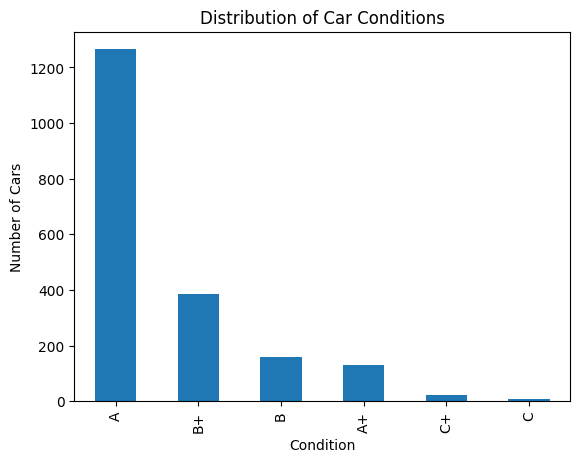

In [64]:

df["condition_name"].value_counts().plot(kind="bar")
plt.title("Distribution of Car Conditions")
plt.xlabel("Condition")
plt.ylabel("Number of Cars")
plt.show()


In [65]:
df.head(20)

,normal,crack,dent,glass_shatter,lamp_broken,scratch,tire_flat,description_rating,rating,condition,condition_name
0,6,0,0,0,0,0,0,2,NaN,6,A
1,10,0,0,0,0,0,0,4,NaN,6,A
2,6,0,0,0,0,0,0,2,NaN,6,A
3,4,0,0,0,0,0,0,2,NaN,6,A
4,8,0,0,0,0,0,0,4,7.0,7,A+
5,2,0,2,0,0,0,0,4,NaN,4,B
6,8,0,0,0,0,0,0,4,NaN,6,A
7,6,0,0,0,0,0,0,4,NaN,6,A
8,11,0,0,0,0,0,0,5,9.0,7,A+
9,9,0,1,0,0,0,0,4,NaN,5,B+


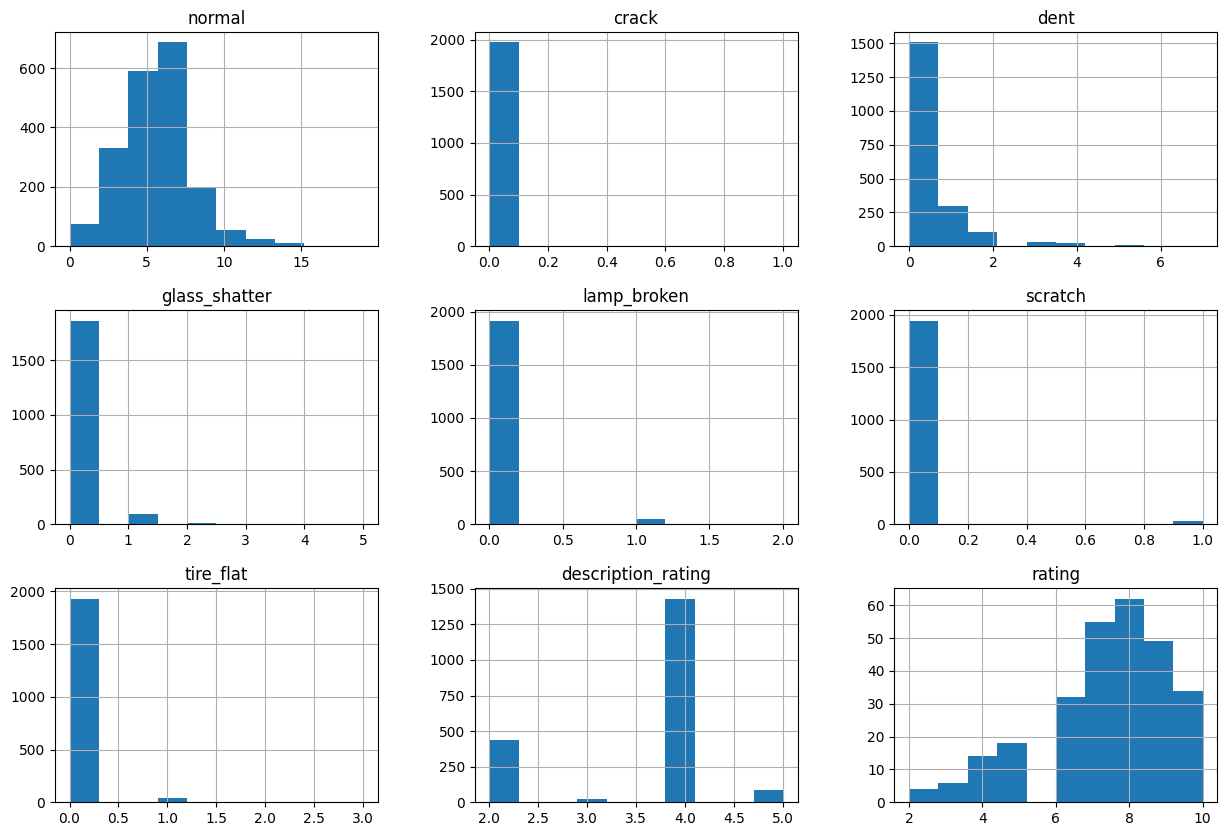

In [66]:
inputs.hist(figsize=(15,10))
plt.show()

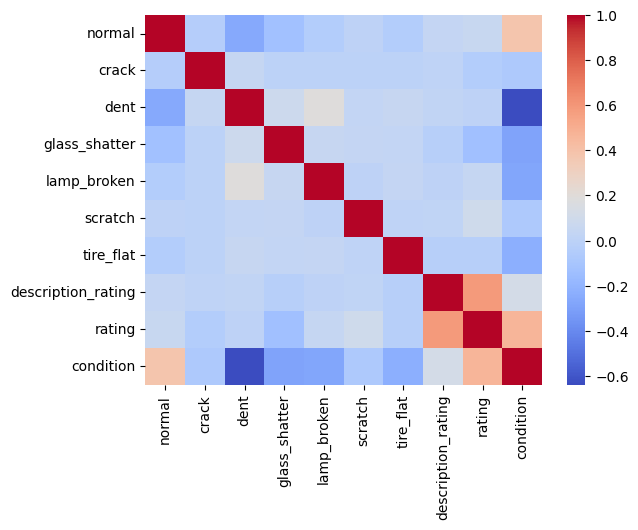

In [68]:
corr = df.corr(numeric_only=True)

sns.heatmap(corr, annot=False, cmap="coolwarm")
plt.show()

In [ ]:

#yaha say dhek na kl 

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(df["condition"])

In [79]:
X = df.drop(columns=["condition", "condition_name"])


In [80]:
print(X)

      normal  crack  dent  glass_shatter  lamp_broken  scratch  tire_flat  \
0          6      0     0              0            0        0          0   
1         10      0     0              0            0        0          0   
2          6      0     0              0            0        0          0   
3          4      0     0              0            0        0          0   
4          8      0     0              0            0        0          0   
...      ...    ...   ...            ...          ...      ...        ...   
1968       2      0     2              0            0        0          0   
1969       2      0     2              0            0        0          0   
1970       4      0     0              0            0        0          0   
1971       3      0     0              0            0        0          0   
1972       4      0     0              0            0        0          0   

      description_rating  rating  
0                      2     NaN  
1    

In [81]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [83]:

model = XGBClassifier(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.05,
    random_state=42,
    eval_metric="mlogloss"
)

model.fit(X_train, y_train)

,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'mlogloss'


In [84]:
y_pred = model.predict(X_test)


In [85]:
from sklearn.metrics import accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8329113924050633


In [86]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.00      0.00      0.00         5
           2       0.63      0.59      0.61        32
           3       0.72      0.70      0.71        77
           4       0.89      0.93      0.91       253
           5       0.83      0.77      0.80        26

    accuracy                           0.83       395
   macro avg       0.68      0.58      0.62       395
weighted avg       0.82      0.83      0.83       395



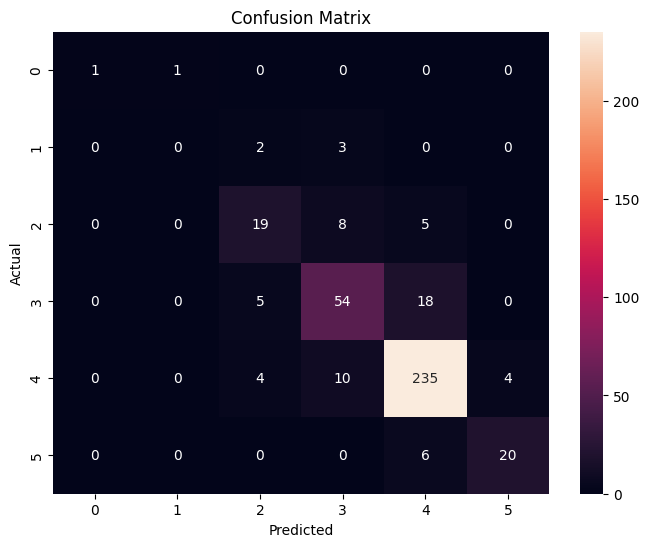

In [87]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [88]:
import pandas as pd

results = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred
})

print(results.head(20))


AttributeError: 'numpy.ndarray' object has no attribute 'values'

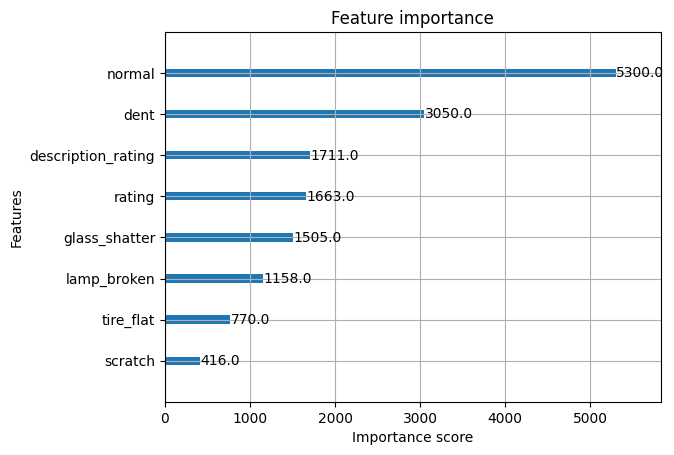

In [89]:
import xgboost as xgb
import matplotlib.pyplot as plt

xgb.plot_importance(model, max_num_features=15)
plt.show()
